# Analysis of Mercury Data
--

# Import Dependancies and Data files

In [90]:
#Import dependancies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import urllib.request

import time
from scipy.stats import linregress

In [92]:
#import datafile from CSV sample file and name as a variable 
#CSV file we downloaded from CA open data that Adam cleaned up & adjusted unit types to match
me_data_import = "../CA_Water_Analysis/Mer-Water-Lab-Data.csv"
me_data = pd.read_csv(me_data_import)


# Clean Data For Further Analysis

In [93]:
#Clean data by splitting combined date and time from sample_date field into a single date only field.
for idx, row in me_data.iterrows(): 
    year=row['sample_date'].split(' ')[0].split('/')[-1]
    date=row['sample_date'].split(' ')[0]
    time=row['sample_date'].split(' ')[-1]
    new_date=date.split('/')[:-1]
    new_date=new_date+[f'{year}']
    new_date_str='/'.join(new_date)
    
    me_data.loc[idx, 'sample_date']=new_date_str


# Isolate 10-Year Period Time Segmented Data for Further Analysis

In [94]:
#convert sample date field to panda date format, print to check
me_data['sample_date'] = pd.to_datetime(me_data['sample_date'])

# Create DataFrame for 2012 to 2022
me_data_df = pd.DataFrame(me_data)
start_date = '2012-01-01'
end_date = '2022-12-31'
mask = (me_data_df['sample_date'] > start_date) & (me_data_df['sample_date'] <= end_date)
  
me_data_df = me_data_df.loc[mask]


me_data_df.head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
39,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0116B0008,2016-01-19,1.0,Meters,Dissolved Mercury,0.0,0.0002,ug/L,EPA 200.8 (Hg Dissolved)
40,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,DA0212B3393,2012-02-13,1.0,Meters,Dissolved Mercury,0.0,0.0002,ug/L,EPA 200.8 (Hg Dissolved)
42,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0216B0018,2016-02-16,1.0,Meters,Dissolved Mercury,0.0,0.0002,ug/L,EPA 200.8 (Hg Dissolved)
46,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0219B0018,2019-02-19,1.0,Meters,Dissolved Mercury,0.0,0.0002,ug/L,EPA 200.8 (Hg Dissolved)
52,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,DA0312B3447,2012-03-19,1.0,Meters,Dissolved Mercury,0.0,0.0002,ug/L,EPA 200.8 (Hg Dissolved)


In [95]:
#count the number of samples for the period
Total_Mercury_Samples = me_data_df.size

print(f"There were a total of {Total_Mercury_Samples} Water Samples taken for Mercury between 2012 and 2022")

There were a total of 70164 Water Samples taken for Mercury between 2012 and 2022


# Ground Water vs. Surface Water Analysis

In [116]:
#create a list of stations, indexed by the type of station and count the number of samples for each

stations_list = me_data_df['station_type'].value_counts().index

s_list = []

for station in stations_list:
    #print(station)
    df = me_data_df.loc[ar_data_df['station_type']==station]
    #print the number of datapoints by station type
    print(station,len(df))



Surface Water 3785
Groundwater 83
Other 30


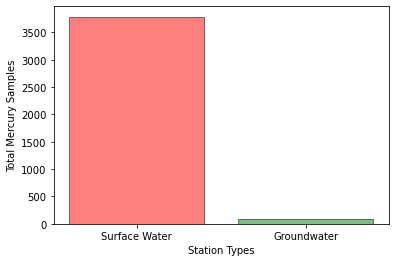

In [117]:
# Create bar chart to display samples by type of test for the period

# Data
labels = ['Surface Water', 'Groundwater']
sizes = [3785, 83]

# Plotting the Stacked Bar Chart
fig, ax = plt.subplots()
y_pos = np.arange(len(labels))
ax.bar(y_pos, sizes, align='center', alpha=0.5, color=['red', 'green', 'blue'], edgecolor='black')

# Title and X and Y Axis Labels
#plt.title("Water sources")
plt.xticks(y_pos, labels)
plt.xlabel("Station Types")
plt.ylabel("Total Mercury Samples")

# Display the Stacked Bar Chart
plt.show()

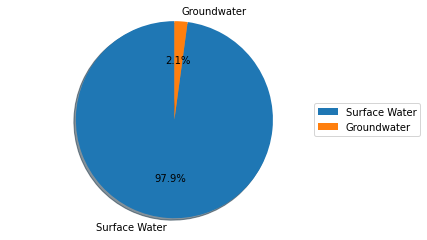

In [118]:
# Create pie chart to display samples by type of test for the period
labels = ['Surface Water', 'Groundwater']
sizes = [3785, 83]

# Pie Chart Plot
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # note: Equal aspect ratio ensures that pie is drawn as a circle

# Plot title on left
#plt.title("Mercury 2012-2022", loc='left')

# Plot legend at the bottom
plt.legend(labels, loc='center left', bbox_to_anchor=(0.9, 0, 0.5, 1))

# Display the Pie Chart
plt.show()



# County by County Analysis

In [119]:
#Calculate the number of samples in each county
#Title for this output
print("Total Mercury Samples Taken Per County:")

#create a list of countys, indexed by county

countys_list = ar_data_df['county_name'].value_counts().index

c_list = []

#use for loop to create a new county dataframe called county_df

for county in countys_list:
    #print(county)
    county_df = ar_data_df.loc[ar_data_df['county_name']==county]
    #print the number of datapoints by county type
    
    print(county,len(county_df))
    #result = df["result"].nunique()
    #print(stations_list)


Total Mercury Samples Taken Per County:
Yolo 533
Merced 393
Solano 344
Butte 335
Alameda 273
Kern 249
San Bernardino 247
Shasta 183
Lake 182
Tehama 175
Plumas 135
Los Angeles 117
Contra Costa 116
Sutter 96
Kings 93
Modoc 69
Riverside 55
San Joaquin 50
Humboldt 47
Sacramento 32
Lassen 25
Siskiyou 22
Yuba 21
Colusa 19
Amador 16
Mendocino 16
Napa 15
Del Norte 10
Glenn 10
Calaveras 9
Trinity 6
Santa Clara 4
San Luis Obispo 1
